In [1]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
import pdb
from collections import defaultdict
### These imports give fit_transform method for free ###
from sklearn.base import BaseEstimator, TransformerMixin 
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import MaxAbsScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
import pdb
from collections import defaultdict
import pickle

In [2]:
# import the scikit-learn compatible transformer pipeline ##
#from simformer import SimFormer

In [3]:
datapath = '../Ram/Data_Sets/'
filename = 'heart.csv'
sep = ','

In [5]:
###### train data set for the model #####
df = pd.read_csv(datapath+filename,sep=sep)
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
from featurewiz import FeatureWiz

Imported DASK version = 0.0.91. nrows=None uses all rows. Set nrows=1000 to randomly sample fewer rows.
output = featurewiz(dataname, target, corr_limit=0.70, verbose=2, sep=',', 
		header=0, test_data='',feature_engg='', category_encoders='',
		dask_xgboost_flag=False, nrows=None)
Create new features via 'feature_engg' flag : ['interactions','groupby','target']
                                


In [7]:
### Once the SimFormer pipeline is built, it can work with Featurewiz ##
#smp = SimFormer(with_model=False, date_to_string=False)
FW = FeatureWiz()

In [9]:
target = 'target'
modeltype = 'Classification'

In [10]:
if isinstance(target, str):
    cols = [x for x in list(df) if x not in [target]]
else:
    cols = [x for x in list(df) if x not in target]
X = df[cols]
y = df[target]
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [11]:
###  find the y values that have low samples ####
if modeltype != 'Regression':
    low_counts = y.value_counts()[(y.value_counts()<=1).values].index
    print(len(low_counts))
    ## You need to remove those rows that have just one sample ##
    X = X[~(y.isin(low_counts))]
    y = y[~(y.isin(low_counts))]
X.shape, y.shape

0


((303, 13), (303,))

In [12]:
from sklearn.model_selection import train_test_split
if modeltype == 'Regression':
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=999)
else:
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,stratify=y, random_state=999)
print(X_train.shape, X_test.shape)

(272, 13) (31, 13)


In [13]:
### This returns a transformer + feature selection pipeline once you fit it ###
#mlp = smp.fit(X_train, y_train)
#FW.fit(X_train, y_train)

In [14]:
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin 
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import MaxAbsScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
pipe = Pipeline([('fw', FeatureWiz()),('logistic', LogisticRegression())])
param_grid = {"logistic__C": np.logspace(-4, 4, 4)}
search = RandomizedSearchCV(estimator=pipe,
                            param_distributions=param_grid,
                            scoring='accuracy',
                            n_iter=3,
                            n_jobs=-1,
                            random_state=99,
                            cv=3,
                            error_score=1)

############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
Loading train data...
    Shape of your Data Set loaded: (272, 14)
    Caution: We will try to reduce the memory usage of dataframe from 0.03 MB
    Memory usage after optimization is: 0.01 MB
        decreased by 78.3%
     Loaded. Shape = (272, 14)
No test data filename given...
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    13 Predictors classified...
        No variables removed since no ID or low-information var

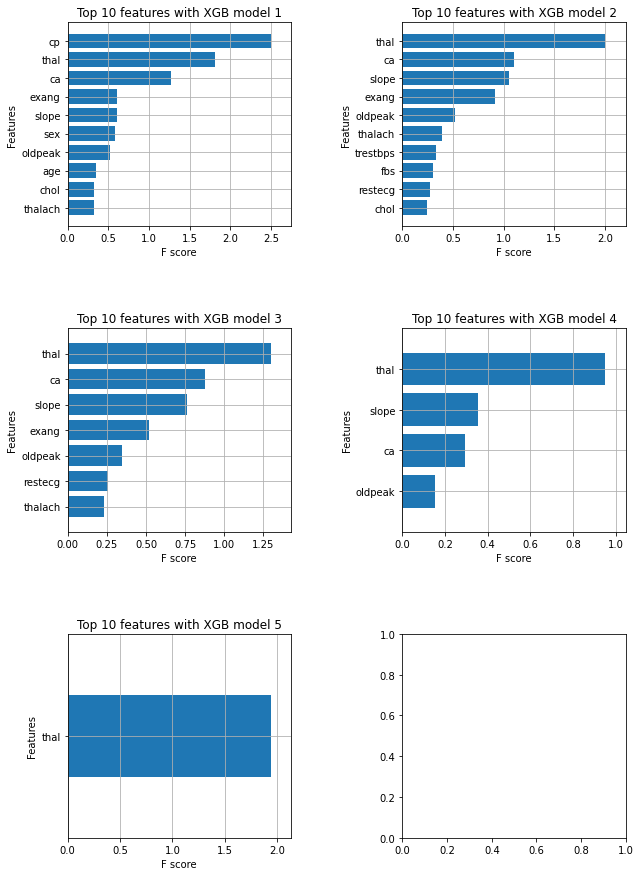

            Total time taken for XGBoost feature selection = 2 seconds
    ID variables are always selected so that rows can be identified. But they are not important!
Selected 13 important features:
['cp', 'thal', 'ca', 'exang', 'slope', 'sex', 'oldpeak', 'age', 'chol', 'thalach', 'trestbps', 'fbs', 'restecg']
    Time taken = 2 seconds
Returning list of 13 important features and a dataframe.
    Time taken to create entire pipeline = 2 second(s)


RandomizedSearchCV(cv=3, error_score=1,
                   estimator=Pipeline(steps=[('fw', FeatureWiz()),
                                             ('logistic',
                                              LogisticRegression())]),
                   n_iter=3, n_jobs=-1,
                   param_distributions={'logistic__C': array([1.00000000e-04, 4.64158883e-02, 2.15443469e+01, 1.00000000e+04])},
                   random_state=99, scoring='accuracy')

In [15]:
search.fit(X_train, y_train)

In [16]:
y_pred = search.predict(X_test)
y_pred.shape

(31,)

In [17]:
from sklearn.metrics import balanced_accuracy_score, mean_squared_error
if modeltype == 'Regression':
    print(np.sqrt(mean_squared_error(y_test, y_pred)))
else:
    print(balanced_accuracy_score(y_test, y_pred))

0.8697478991596639


In [19]:
from sklearn import set_config
#### You can display your pipeline in a nice diagram if it is a Jupyter Notebook ##
set_config(display="diagram")
pipe

Pipeline(steps=[('fw', FeatureWiz()), ('logistic', LogisticRegression())])